# Computer Assigment 1

## Imports

In [46]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, accuracy_score


%matplotlib inline

## Exercise 1

* This exercise refers to the "Illumination" problem from the book "Introduction to Applied Linear Algebra", chapter 12.4.

The problem may be briefely described as follows:
* In a room $m$ x $m$ we have $n=10$ lamps in the following positions (x, y, height):

`{(4.1, 20.4, 4), (14.1, 21.3, 3.5), (22.6, 17.1, 6), (5.5, 12.3, 4), (12.2, 9.7, 4)}` <br>
`{(15.3, 13.8, 6), (21.3, 10.5, 5.5), (3.9, 3.3, 5), (13.1, 4.3, 5), (20.3, 4.2, 4.5)}`

We separate the rooms into equal squares (pixels). The lamps may have various power levels, illuminating the $i^{th}$ pixel in a different way. The vector of
illumination levels is a linear function of the lamp powers, so we have $l = Ap$ forsome $m$ x $n$ matrix $A$.

Our mission is to find lamp powers that result in a desired illumination pattern $l^{des}$, such as $l^{des} = \alpha \cdot 1$ (1 the vector with all ones) which is uniform illumination
with value across the area. In other words, we seek $p$ so that $Ap \approx l^{des}$.

### 1.1 

* Create two graphs to show the illumination of the two patterns: The first with all lamps set to 1 and the other that minimize the sum square deviation with a desired uniform illumination. Which are the RMS errors in both cases?

In [47]:
# define lamp positions
pos = [(4.1, 20.4, 4), (14.1, 21.3, 3.5), (22.6, 17.1, 6), (5.5, 12.3, 4), (12.2, 9.7, 4),
(15.3, 13.8, 6), (21.3, 10.5, 5.5), (3.9, 3.3, 5), (13.1, 4.3, 5), (20.3, 4.2, 4.5)]
pos = np.array(pos)

In [48]:
# define A table
A = np.zeros((625,10))
for i in range(25):
    for j in range(25):
        for a, z in enumerate(pos):
            # print((i*25+j), a)
            A[i*25+j, a] = np.power(np.linalg.norm((np.array([i+0.5,j+0.5,0]) - z)),-2)
A.shape

(625, 10)

In [49]:
# define p table
p = np.ones((10,1))

# define ldes table
ldes = np.ones((625,1))

In [50]:
# calculate the illumination level 
output = A.dot(p).flatten().reshape((25,25)).T

# scale illumination level matrix
alpha = 1/output.mean()

A = alpha*A

output = A.dot(p).flatten().reshape((25,25)).T
output.mean()


0.9999999999999998

In [51]:
def plot_heatmap(input, pos, ls=False):
    """
    Function to plot the illumination heatmap along with the lamp positions
    INPUT: np.array (25x25), lamp positions (x,y,z)
    OUTPUT: None
    """
    # Create figure
    plt.figure(figsize=(7,5))

    # plot heatmap
    ax = sns.heatmap(input, cmap='Spectral_r', vmin=0.5, vmax=1.5)

    # Plot lamp points
    ax.scatter(pos[:,0], pos[:,1])
    for i in pos:
        ax.text(i[0]-1.5, i[1]+0.5, f"({i[0]},{i[1]})")
        ax.text(i[0]-1, i[1]-1, f"h={i[2]}m")

    if ls:
        ax.set_title("Illumination pattern for the lamp powers that minimize the\
        \nsum square deviation with a desired uniform illumination of one", fontsize=15)
    else:
        ax.set_title("Illumination pattern with lamps set to power one.", fontsize=15)
    _ = ax.invert_yaxis()

### Illumination pattern with lamps set to power one.

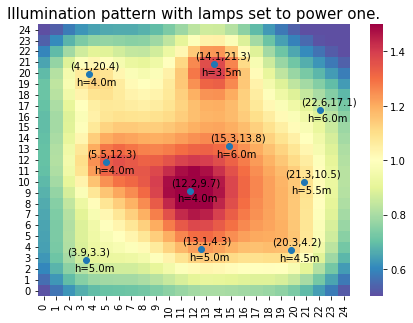

In [52]:
plot_heatmap(output, pos)

* Having the base illunimation pattern (with all powers set to 1) we will find the $\hat{p}$ that minimizes the sum square deviation from the desired illumination:

$ \Vert Ap - l^{des} \Vert^2 $

As know the solution is: $ A^T A \hat{p} = A^T l^{des} $

Which can, generally, be solved using: $ \hat{p} = (A^T A)^{-1} A^T l^{des} $

This, however, is usually not the best way to solve the problem, since there can be many numerical instabilities. \
For this reason, other methods, like the QR ddecomposition, are often prefered. We will use the QR method in this case.

In [53]:
# Find cond of A to see if the problem is ill-conditioned
np.linalg.cond(output)

3403329717.274923

In [54]:
# Calculate
Q, R = np.linalg.qr(A)

# verify the results
Q.T.dot(Q).diagonal()

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [55]:
# perform LS (QR method)
p_ls = np.linalg.inv(R).dot(Q.T).dot(ldes)
p_ls.flatten()

array([1.46211018, 0.78797433, 2.96641047, 0.74358042, 0.08317333,
       0.21263945, 0.21218408, 2.05114815, 0.90760315, 1.47222464])

### Illumination pattern for the lamp powers that minimize the sum square deviation with a desired uniform illumination of one

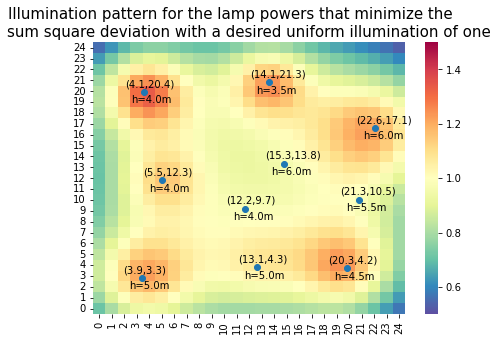

In [56]:
# plot LS illumination pattern (QR method)
output_ls = A.dot(p_ls).flatten().reshape((25,25)).T
plot_heatmap(output_ls, pos, True)

### RMS error in each case

In [57]:
RMS_raw = mean_squared_error(output.flatten(),ldes.flatten(), squared=False)
RMS_LS = mean_squared_error(output_ls.flatten(),ldes.flatten(), squared=False)


print("The RMS error for each case is:")
print(f"{'Power levels = 1:' : >20} {RMS_raw:5.2f}")
print(f"{'LS powers:' : >20} {RMS_LS:5.2f}")


The RMS error for each case is:
   Power levels = 1:  0.24
          LS powers:  0.14


### 1.2. 

Create the histogram of patch illumination values for all lamp powers one, and for lamp powers found by LS.

* As we can see from the graph below, in the second case (LS) the number of pixel whose power is 1 is much higher, compared to the first case (all lamps's power one). Moreover, the std is also smaller, which is desirable.

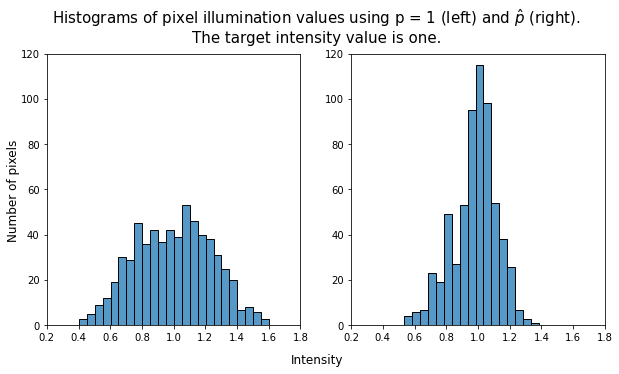

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(output.flatten(), ax=ax[0], binwidth=0.05)
sns.histplot(output_ls.flatten(), ax=ax[1], binwidth=0.05)

for axis in ax:
    axis.set_ylim(0, 120)
    axis.set_xlim(0.2,1.8)
    axis.set_ylabel(None)

fig.suptitle("Histograms of pixel illumination values using p = 1 (left) and $\hat{p}$ (right). \nThe target intensity value is one.", fontsize=15, y=1.01)
fig.supylabel("Number of pixels", x=0.07)
_ = fig.supxlabel("Intensity")

## Exercise 2

* The aim of this exercise is to predict whether a given banknote is authentic given a number of measures.

Using the least square procedure we will create a classifier and then a confution matrix for the training set. We will classify the points based on the rule: \
*"If the prediction value > 0:5 then classify the item as 1 otherwise as 0."*

If that leads to serious unbalancing we will try to find -heuristically- a value that balance the two numbers.

In [59]:
# read train data
train = pd.read_csv('./train_backnotes.csv')
train = train.iloc[:,1:6]
train.head()

,variance,skewness,kurtosis,entropy,output
0,1.1472,3.59850,1.9387,-0.43406,0
1,-1.7322,-9.28280,7.7190,-1.71680,1
2,-1.1022,-5.83950,4.5641,0.68705,1
3,-1.7063,2.79560,-2.3780,-2.34910,1
4,4.8265,0.80287,1.6371,1.18750,0


In [60]:
# read test data
df1 = pd.read_csv('./test_backnotes.csv').set_index('Unnamed: 0')
df2 = pd.read_csv('./test_backnotes_l.csv').set_index('Unnamed: 0')

# define df & drop index 
test = df1.join(df2)
test.reset_index(inplace=True, drop=True)

# free memory
del df1, df2

test.head()

,variance,skewness,kurtosis,entropy,output
0,3.86600,-2.6383,1.9242,0.10645,0
1,-1.57680,10.8430,2.5462,-2.93620,0
2,4.43380,9.8870,-4.6795,-3.74830,0
3,-0.38214,8.3909,2.1624,-3.74050,0
4,4.89060,-3.3584,3.4202,1.09050,0


* We will start by defining the tables needed to solve the problem. We need to fabricate the problem in a form of:

$ Ax=y $

and following the same procedure as Ex. 1 we will derive the LS coefficients. A vector of ones will be added to $A$ which will, in practice, calculate the intercept. This is presented below.

In [61]:
y_train = train['output'].to_numpy()
A_train = np.concatenate((np.ones((y_train.shape[0], 1)), train[['variance', 'skewness', 'kurtosis', 'entropy']].to_numpy()), axis=1)

In [62]:
np.concatenate((np.ones((y_train.shape[0], 1)), train[['variance', 'skewness', 'kurtosis', 'entropy']].to_numpy()), axis=1)

array([[ 1.      ,  1.1472  ,  3.5985  ,  1.9387  , -0.43406 ],
       [ 1.      , -1.7322  , -9.2828  ,  7.719   , -1.7168  ],
       [ 1.      , -1.1022  , -5.8395  ,  4.5641  ,  0.68705 ],
       ...,
       [ 1.      , -4.4996  ,  3.4288  ,  0.56265 , -1.1672  ],
       [ 1.      , -0.16735 ,  7.6274  ,  1.2061  , -3.6241  ],
       [ 1.      ,  3.9479  , -3.7723  ,  2.883   ,  0.019813]])

* For the calculation of the inverse table, QR decomposition will be used.

In [63]:
# Calculate
Q, R = np.linalg.qr(A_train)

# verify the results
Q.T.dot(Q).diagonal()

array([1., 1., 1., 1., 1.])

In [64]:
# perform LS (QR method)
x_ls = np.linalg.inv(R).dot(Q.T).dot(y_train)
x_ls.flatten()

array([ 7.94404483e-01, -1.42445381e-01, -7.71582130e-02, -1.01191385e-01,
       -6.23563698e-04])

### Training set confusion matrix & threshold optimization

* Having estimated the solution using LS, we can use the information presented thus far to make predictions.

In [65]:
y_pred = pd.Series(A_train.dot(x_ls)).apply(lambda x: 1 if x >=0.5 else 0)
conf_train = confusion_matrix(y_train, y_pred)
print(conf_train)

[[533  25]
 [  0 471]]


In [66]:
df_train = pd.DataFrame({'pred' : A_train.dot(x_ls), 'actual' : y_train})
df_train.head()

,pred,actual
0,0.157428,0
1,0.977367,1
2,0.939697,1
3,1.063853,1
4,-0.121457,0


In [67]:
def plot_dist(df, thresh):
    """
    Function to plot the density plot of the predictions
    INPUT: pd.DataFrame, threshold
    OUTPUT: None
    """

    # plot the density plot
    d = sns.displot(data = df, x='pred', hue='actual', kind="kde", fill=True, height=5, aspect=1.3)
    plt.axvline(thresh, color='r')
    plt.text(thresh+0.02,0.7,'Classifier threshold', rotation=90)
    _ = d.set(xlabel='Predictions')

* in order to see how the classifier is performing we will plot the actual values derived for each class and compare them to the actual ones. We will also plot a line which corresponds to the threshold of 0.5.

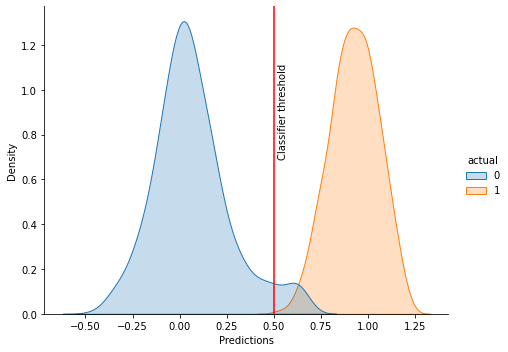

In [68]:
plot_dist(df_train, 0.5)

* As we can see the optimal threshold value which would lead to a better classification result, is that of the Bayes classifier decision boundary. 

We can find the value programmatically, throught an iteration.

In [69]:
# find number of current correct predictions
best = conf_train.diagonal().sum()
best_pred = y_pred
thresh = 0.5

# threshold is around 0.5 and 0.75
for i in np.arange(0.5,0.75,0.01):

    # if correct predictions are more that the best, update thresh
    y_pred = pd.Series(A_train.dot(x_ls)).apply(lambda x: 1 if x >= i else 0)
    search = confusion_matrix(y_train, y_pred).diagonal().sum()
    if search > best:
        print(f'Previous best (correct predictions): {best}, current best: {search}')
        best = search
        thresh = i
        best_pred = y_pred

print(f"\n\nOptimal threshold is: {thresh:.2f}")

Previous best (correct predictions): 1004, current best: 1007
Previous best (correct predictions): 1007, current best: 1009
Previous best (correct predictions): 1009, current best: 1011
Previous best (correct predictions): 1011, current best: 1014
Previous best (correct predictions): 1014, current best: 1020


Optimal threshold is: 0.63


* We can plot the predictions on the training set along with the optimal threshold for the classifier.

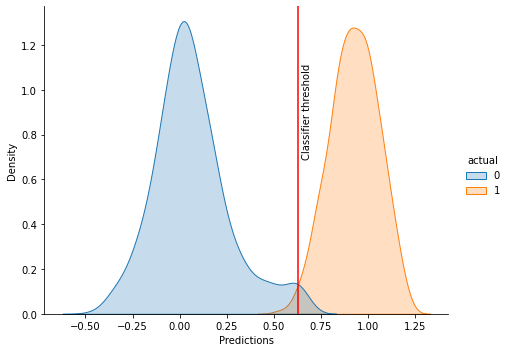

In [70]:
plot_dist(df_train, thresh)

* The confusion matrix is looking better:

In [71]:
print(confusion_matrix(y_train, best_pred))

[[553   5]
 [  4 467]]


### Test set confusion matrix & predictions

In [72]:
y_test = test['output'].to_numpy()
A_test = np.concatenate((np.ones((y_test.shape[0], 1)), test[['variance', 'skewness', 'kurtosis', 'entropy']].to_numpy()), axis=1)

In [73]:
y_pred_t = pd.Series(A_test.dot(x_ls)).apply(lambda x: 1 if x >= thresh else 0)
conf_train = confusion_matrix(y_test, y_pred_t)
print(conf_train)

[[204   0]
 [  3 136]]


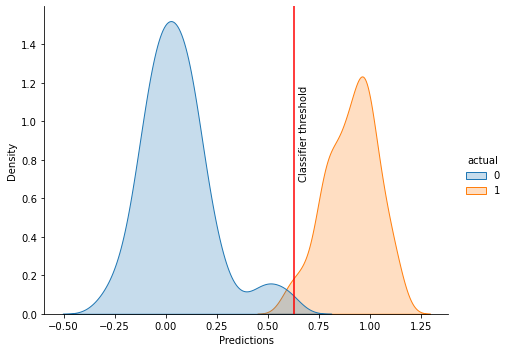

In [74]:
df_test = pd.DataFrame({'pred' : A_test.dot(x_ls), 'actual' : y_test})
df_test.head()

plot_dist(df_test, thresh)

* We can see that the threshold for an optimal classification in the training set would be slighly lower than the one we have used. Neverthelesss, the classifier has a good performance and testing data should not be used for development.

We will calculate the train and test error rates.

Train accuracy:	 95.92
Test accuracy:	 99.13


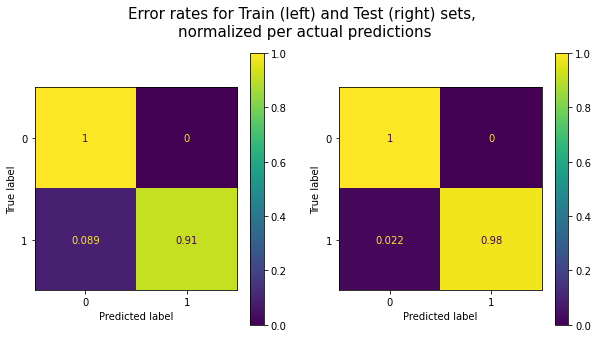

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

cm_train = confusion_matrix(y_train, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(cm_train)
disp.plot(ax=ax[0])


cm_test = confusion_matrix(y_test, y_pred_t, normalize='true')
disp = ConfusionMatrixDisplay(cm_test)
disp.plot(ax=ax[1])


_ = fig.suptitle("Error rates for Train (left) and Test (right) sets, \nnormalized per actual predictions", fontsize=15, y=1.01)
print(f"Train accuracy:\t {accuracy_score(y_train, y_pred)*100:.2f}")
print(f"Test accuracy:\t {accuracy_score(y_test,y_pred_t)*100:.2f}")



## Bonus 

Following techniques proposed in paragraph 13.3 try to increase the accuracy of the model.

* As suggested in the corresponding chapter of the book, we can create new features using the existing ones. Since the features in the given dataset do not represent real values (like for example house prices) we will perform combinations of those to see the results.

In [76]:
def feature_engineering(df):
    """
    Function that performs feature engineering on a given pd.DataFrame. 
    The new features generated are the product of all possible feature combination
    INPUT: pd.DataFrame
    OUTPUT: pd.DataFrame
    """
    
    for i, col in enumerate(df[['variance', 'skewness', 'kurtosis', 'entropy']]):
        for other_col in df[['variance', 'skewness', 'kurtosis', 'entropy']]:
                if col != other_col and f"{other_col}_{col}" not in df.columns:
                        df[f"{col}_{other_col}"] =  df[col] * df[other_col]   
    return df

In [77]:
def return_ls(A, y):
        """
        Function that return the x matrix using LS, for the Ax=y problem.
        QR decomposition is used to fetch the results.
        INPUT: A -> matrix (np.array), y -> vector (np.array)
        OUTPU: x -> vector (np.array)
        """
        # Calculate
        Q, R = np.linalg.qr(A)

        # verify the results
        Q.T.dot(Q).diagonal()
        
        # perform LS (QR method)
        x_ls = np.linalg.inv(R).dot(Q.T).dot(y)
        return x_ls 

def make_pred(A, LS, thresh):
        """
        Function that makes predictions given two tables A & x based on a threshold
        INPUT: A -> matrix (np.array), x -> vector (np.array), thresh -> int
        OUTPUT: y -> vector (np.array)
        """
        y = pd.Series(A.dot(LS)).apply(lambda x: 1 if x >= thresh else 0)
        return(y)

def find_optim_thresh(A, LS, y):
        """
        Function that find the optimal threshold, which convert continious predictions to binary
        INPUT: A -> matrix (np.array), LS -> vector (np.array), y -> vector (np.array)
        OUTPUT: thresh -> int
        """
        y_pred = make_pred(A, LS, 0.5)
        conf_train = confusion_matrix(y, y_pred)

        # find number of current correct predictions
        best = conf_train.diagonal().sum()
        best_pred = y_pred
        thresh = 0.5

        # threshold is around 0.5 and 0.75
        for i in np.arange(0.5,0.75,0.01):
                # if correct predictions are more that the best, update thresh
                y_pred = pd.Series(A.dot(LS)).apply(lambda x: 1 if x >= i else 0)
                search = confusion_matrix(y, y_pred).diagonal().sum()
                if search > best:
                        print(f'Threshold: {i:.2f}. Previous best (correct predictions): {best}, current best: {search}')
                        best = search
                        thresh = i
                        best_pred = y_pred

        print(f"\n\nOptimal threshold is: {thresh:.2f}")

        return thresh


* We will perform the feature engineering in the `train` and `test` DataFrames, and calculate the LS solution on the updated train dataset.

In [78]:
# Define feature engineered dataframes
train_bonus, test_bonus = feature_engineering(train.copy()), feature_engineering(test.copy())

# Define tables with intercept
A_train_bonus = np.concatenate((np.ones((y_train.shape[0], 1)), train_bonus.loc[:, train_bonus.columns!='output'].to_numpy()), axis=1)
A_test_bonus = np.concatenate((np.ones((y_test.shape[0], 1)), test_bonus.loc[:, test_bonus.columns!='output'].to_numpy()), axis=1)

# find LS solution
x_ls_bonus = return_ls(A_train_bonus, y_train)

* Having calculated the LS table, we can optimize the threshold, for the predictions.

In [79]:
thresh_bonus = find_optim_thresh(A_train_bonus, x_ls_bonus, y_train)

Threshold: 0.51. Previous best (correct predictions): 1008, current best: 1011
Threshold: 0.53. Previous best (correct predictions): 1011, current best: 1013
Threshold: 0.54. Previous best (correct predictions): 1013, current best: 1017
Threshold: 0.56. Previous best (correct predictions): 1017, current best: 1020
Threshold: 0.59. Previous best (correct predictions): 1020, current best: 1029


Optimal threshold is: 0.59


Train accuracy:	 100.00
Test accuracy:	 100.00


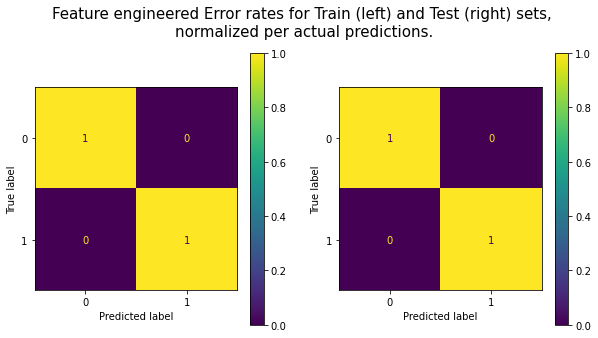

In [80]:
# Save predictions to variables
y_pred_bonus = make_pred(A_train_bonus, x_ls_bonus, thresh_bonus)
y_pred_t_bonus = make_pred(A_test_bonus, x_ls_bonus, thresh_bonus)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Train plot
cm_train = confusion_matrix(y_train, y_pred_bonus, normalize='true')
disp = ConfusionMatrixDisplay(cm_train)
disp.plot(ax=ax[0])

# Test plot
cm_test = confusion_matrix(y_test, y_pred_t_bonus, normalize='true')
disp = ConfusionMatrixDisplay(cm_test)
disp.plot(ax=ax[1])

_ = fig.suptitle("Feature engineered Error rates for Train (left) and Test (right) sets, \nnormalized per actual predictions.", fontsize=15, y=1.01)

# Print Accuracy
print(f"Train accuracy:\t {accuracy_score(y_train, y_pred_bonus)*100:.2f}")
print(f"Test accuracy:\t {accuracy_score(y_test,y_pred_t_bonus)*100:.2f}")


* As we can see, following the instructions of the book, and with a very simple feature engineering method, we managed to achieve a 100% accuracy on the train and test sets.